In [1]:
# çok sayıdaki ham veriyi gruplara ayırmak için kullanılır.
# sınıflandırma işlemi yapar.yeni bir veri geldiği zaman o özelliğe göre atama yapar.
# sınıflandırılmamış veriyi sınıflandırır.
# unsupervised learning grubuna girer.

In [28]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df=pd.read_csv("Avm_Musterileri.csv")
df.head()


,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


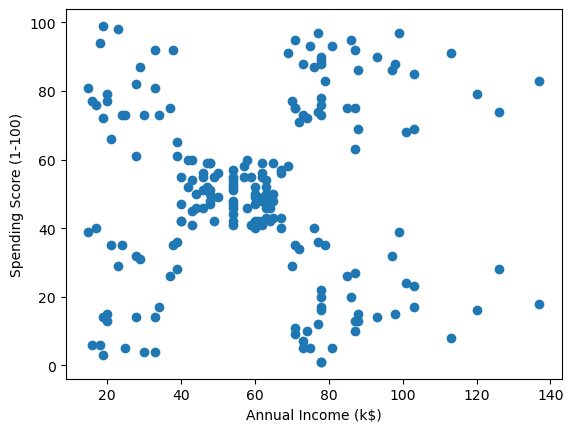

In [29]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [30]:
# bazı sütün isimleri çok uzun oluyor zor olmaması adına kısaltma yapalım

In [31]:
df.rename(columns={"Annual Income (k$)":"income"},inplace=True)
df.rename(columns={"Spending Score (1-100)":"score"},inplace=True)

In [32]:
# modelimize veri yüklemeden önce mutlaka normalize etmemiz gerekiyor.(0 ile1 arasında )
# sklearn kütüphanesinden MinMaxScaler fonksiyonunu kullanıyoruz.

In [33]:
scaler=MinMaxScaler()

scaler.fit(df[["income"]])
df["income"]=scaler.transform(df[["income"]])

scaler.fit(df[["score"]])
df["score"]=scaler.transform(df[["score"]])
df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [34]:
# K değerini belirleyelim.(elbow yöntemiyle)

In [35]:
k_range=range(1,11)
list_dist=[]

for k in k_range:
    kmeans_modelim=KMeans(n_clusters=k)
    kmeans_modelim.fit(df[["income","score"]])
    list_dist.append(kmeans_modelim.inertia_)

C:\Users\veyse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


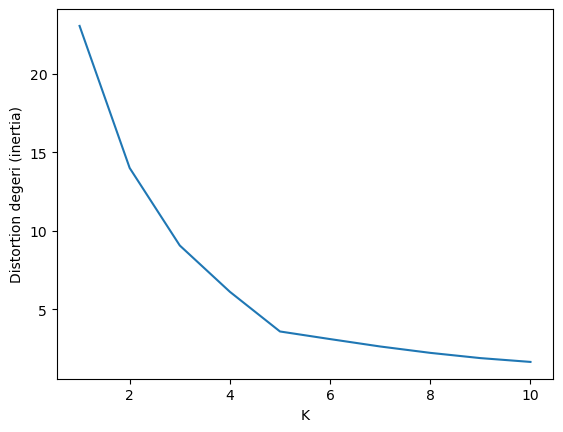

In [36]:
plt.xlabel("K")
plt.ylabel("Distortion degeri (inertia)")
plt.plot(k_range,list_dist)
plt.show()

In [37]:
# en iyi K değeri 5 k=5 olacak

In [38]:
kmeans_modelim=KMeans(n_clusters=5)
y_predicted=kmeans_modelim.fit_predict(df[["income","score"]])
y_predicted

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [55]:
df["cluster"]=y_predicted
df.head()

,CustomerID,income,score,clustrer,cluster
0,1,0.000000,0.387755,4,4
1,2,0.000000,0.816327,2,2
2,3,0.008197,0.051020,4,4
3,4,0.008197,0.775510,2,2
4,5,0.016393,0.397959,4,4


In [40]:
# centroidlerini görelim

In [41]:
kmeans_modelim.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432]])

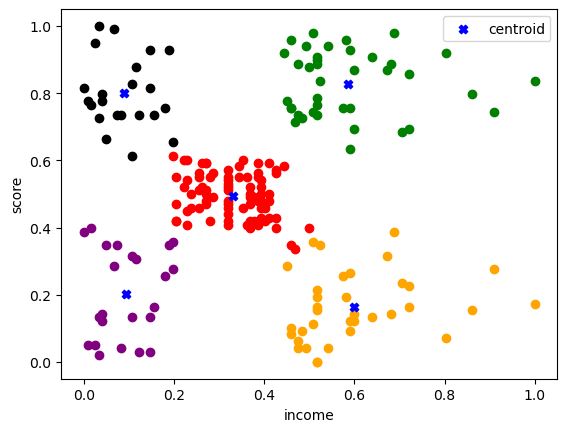

In [56]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]



plt.xlabel("income")
plt.ylabel("score")
plt.scatter(df1["income"],df1["score"],color="green")
plt.scatter(df2["income"],df2["score"],color="red")
plt.scatter(df3["income"],df3["score"],color="black")
plt.scatter(df4["income"],df4["score"],color="orange")
plt.scatter(df5["income"],df5["score"],color="purple")


plt.scatter(kmeans_modelim.cluster_centers_[:,0],kmeans_modelim.cluster_centers_[:,1],color="blue",marker="X",label="centroid")
plt.legend()
plt.show()
